<a href="https://colab.research.google.com/github/JayabharathiRavi/D19Task5/blob/main/Copy_of_TASK5_D19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TASK 5**

Lets import the needed libraries

In [55]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

###### I am going to provide two .csv files which is takehome_user_engagement.csv and takehome_users.csv

In [10]:
df_user_engagement=pd.read_csv('/content/takehome_user_engagement.csv')

In [11]:
df_users = pd.read_csv('/content/takehome_users.csv', encoding='unicode_escape')

In [12]:
df_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [13]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


Check are there any nan values in takehome_user_engagement and takehome_users



> df_user_engagement



In [14]:
df_user_engagement[df_user_engagement.isnull()].count()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [15]:
df_user_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0




>df_users



In [16]:
df_users[df_users.isnull()].count()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [17]:
df_users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [ ]:
#Now there is no NAN values in both takehome_user_engagement and takehome_users

The Dataset takehome_user_engagement.csv, will be used to determine whether any particular user is an adopted user or not.
(adopted user -a user who has logged into the product on three separate days in at least one seven day period). 

# Timestamp

In [18]:
df_user_engagement['TIME_STAMP'] = pd.to_datetime(df_user_engagement['time_stamp'])

# user_id

In [19]:
df_user_engagement['user_id']

0             1
1             2
2             2
3             2
4             2
          ...  
207912    11996
207913    11997
207914    11998
207915    11999
207916    12000
Name: user_id, Length: 207917, dtype: int64

In [20]:
a=sorted(list(df_user_engagement['user_id'].unique()))

# Visited

In [21]:
df_user_engagement['visited']

0         1
1         1
2         1
3         1
4         1
         ..
207912    1
207913    1
207914    1
207915    1
207916    1
Name: visited, Length: 207917, dtype: int64

In [22]:
sorted(list(df_user_engagement['visited'].unique()))

[1]

# Object_id

> Verify is there any duplicate object_id in df_users

In [23]:
df_users[df_users['object_id'].duplicated()]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id


In [24]:
#There is no duplicated values in object_id

In [25]:
df_users['Creation_time'] = pd.to_datetime(df_users['creation_time'])
df_users['Creation_time']

0       2014-04-22 03:53:30
1       2013-11-15 03:45:04
2       2013-03-19 23:14:52
3       2013-05-21 08:09:28
4       2013-01-17 10:14:20
                ...        
11995   2013-09-06 06:14:15
11996   2013-01-10 18:28:37
11997   2014-04-27 12:45:16
11998   2012-05-31 11:55:59
11999   2014-01-26 08:57:12
Name: Creation_time, Length: 12000, dtype: datetime64[ns]

# Name

In [26]:
print(len(df_users[df_users.name == 0]))

0


# email

In [27]:
print(len(df_users[df_users.email == 0]))


0


# Creation_scorce

In [28]:
print(len(df_users[df_users.creation_source == 0]))


0




> Analysising creation source through pie chart

In [29]:
df_users.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64



>  Create a pie chart


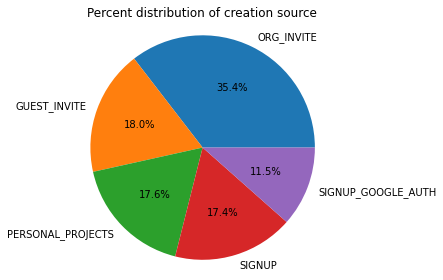

In [30]:
# create dataframe for creation source
df_source = df_users.creation_source.value_counts()
df_source = df_source.reset_index()

# Put parameter values
plt.pie(df_source['creation_source'],labels=df_source['index'],
        autopct='%1.1f%%')

plt.title('Percent distribution of creation source')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Opted_in_to_mailing_list

In [ ]:
df_users.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64



>  Create a pie chart


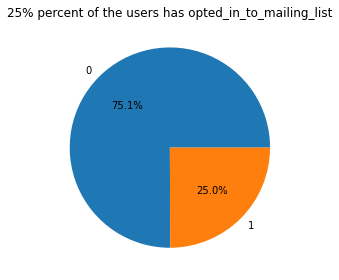

In [ ]:
df_mail = df_users.opted_in_to_mailing_list.value_counts()
df_mail = df_mail.reset_index()
plt.pie(
    df_mail['opted_in_to_mailing_list'],
    labels=df_mail['index'],
    autopct='%1.1f%%'
    )

plt.title('25% percent of the users has opted_in_to_mailing_list')
plt.tight_layout()
plt.show()

# Enabled_for_marketing_drip

In [ ]:
df_users.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

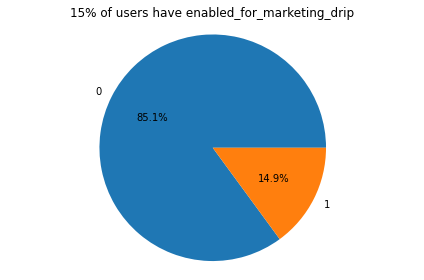

In [ ]:
df_drip = df_users.enabled_for_marketing_drip.value_counts()
df_drip = df_drip.reset_index()

plt.pie(
    df_drip['enabled_for_marketing_drip'],
    labels=df_drip['index'],
    autopct='%1.1f%%'
    )

plt.title('15% of users have enabled_for_marketing_drip')
plt.axis('equal')

plt.tight_layout()
plt.show()

## Org_id


>  what organization has the most users?


In [ ]:
df_users.org_id.value_counts().head(10)

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
Name: org_id, dtype: int64

In [ ]:
# most users belong to organization id: 0 -> 10 except 8

# Invited_by_user_id

> who invited most users



In [ ]:
df_users.invited_by_user_id.value_counts().head(10)

0.0        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
11770.0      11
2354.0       10
10628.0      10
7012.0       10
4803.0       10
Name: invited_by_user_id, dtype: int64

# Features

In [31]:
for feature in ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']:
    print('{} feature:'.format(feature))
    print(df_users[feature].value_counts(), end='\n\n')

creation_source feature:
ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

opted_in_to_mailing_list feature:
0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

enabled_for_marketing_drip feature:
0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64



 
# create dataframe with users that has logged into the product on three separate days in at least one sevenday period



In [32]:
df_adoption = df_user_engagement.groupby(['user_id', pd.Grouper(key='TIME_STAMP',freq='7D')]).filter(lambda x: len(x)>1).groupby('user_id').sum()
df_adoption = df_adoption.reset_index()

In [33]:
df_adoption.head()

,user_id,visited
0,2,4
1,10,277
2,20,2
3,25,2
4,33,12




> merge users and adopted users dataframe

> drop column user_id since it is duplicate with object_id

> replace NaN with zero



In [34]:
df = df_users.merge(df_adoption, left_on='object_id', right_on='user_id', how='outer')
df.drop('user_id', axis=1, inplace=True)
df = df.fillna(0)



> convert unix timestamp to datetime


In [35]:
from datetime import datetime
df['last_session_creation_time'] = df['last_session_creation_time'].apply(
    lambda x: datetime.strptime(str(datetime.fromtimestamp(float(int(x)))), '%Y-%m-%d %H:%M:%S'))
df['creation_time'] = df['creation_time'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

calculate active days

In [36]:
df['days_since_signup'] = df['last_session_creation_time'] - df['creation_time']
df['days_since_signup'] = df['days_since_signup'].apply(lambda x: abs(x.total_seconds()/60/60/24/30)) 

convert creation_source into numeric values

In [37]:
df['creation_source']= df['creation_source'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

create adopted_user column

In [38]:
df['adopted_user']=df['visited'].apply(lambda x: int(x > 0))
# column visited is not needed so drop it
df.drop('visited', axis=1, inplace=True)

In [39]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Creation_time,days_since_signup,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 03:53:30,1,0,11,10803.0,2014-04-22 03:53:30,0.000000,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,316.0,2013-11-15 03:45:04,4.533333,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 23:14:52,0,0,94,1525.0,2013-03-19 23:14:52,0.000000,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2013-05-22 08:09:28,0,0,1,5151.0,2013-05-21 08:09:28,0.033333,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,2013-01-22 10:14:20,0,0,193,5240.0,2013-01-17 10:14:20,0.166667,0


construct the dataset X, y


In [40]:
X = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'days_since_signup']]
y = (df.adopted_user == 1)

Split the data into a training and test set.


In [42]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Fit the model on the trainng data.


In [43]:
from sklearn.linear_model import LogisticRegression 
logistic_regression= LogisticRegression() 
logistic_regression.fit(X_train,y_train) 
y_pred=logistic_regression.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'days_since_signup']]
y = (df.adopted_user == 1)

In [44]:
logistic_regression.predict_proba(X_test)

array([[0.74508208, 0.25491792],
       [0.79189907, 0.20810093],
       [0.8175183 , 0.1824817 ],
       ...,
       [0.76649525, 0.23350475],
       [0.76530763, 0.23469237],
       [0.99077396, 0.00922604]])

In [45]:
logistic_regression.coef_

array([[-0.10602597,  0.05203442,  0.05718669, -0.0068522 ]])

In [46]:
logistic_regression.intercept_

array([-1.07551949])

Print the accuracy from the testing data.


In [53]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(logistic_regression.predict(X_test), y_test))

Accuracy score:  0.833


**confusion matrix**

In [49]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
confusion_matrix(y_test,y_pred)

array([[2499,    0],
       [ 501,    0]])

**auroc**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


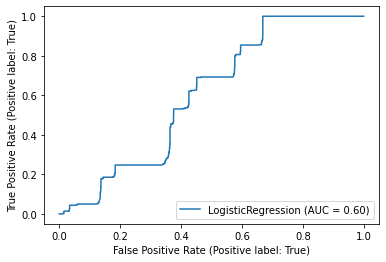

In [51]:
plot_roc_curve(logistic_regression, X_test, y_test)

Print importance of each features


In [54]:
logistic_regression.fit(X_train / np.std(X_train, 0), y_train)
print("Regression coefficients: ", logistic_regression.coef_)
print("Intecept: ", logistic_regression.intercept_) 
print("Column names: ", (X.columns.values))

Regression coefficients:  [[-0.13478627  0.02485985  0.017599   -1.57300595]]
Intecept:  [-1.07684114]
Column names:  ['creation_source' 'opted_in_to_mailing_list' 'enabled_for_marketing_drip'
 'days_since_signup']


# End Result:

*   Here, I used Logistic Regression Algorithm.
*   Where the target variable is binary 0 and 1.
*   If the user is adopted (1) or not (0). 

*   The features are 'creation_source', 'opted_in_to_mailing_list',      'enabled_for_marketing_drip', 'days_since_signup'.

*  Accuracy score is 83%
*  auroc score is 0.60
*  The Regression coefficients are [[-0.13478627 , 0.02485985 , 0.017599 , -1.57300595]]
*  Intercept is [-1.07684114]